<a href="https://colab.research.google.com/github/fidanfatih/Pycoders_Capstone/blob/main/class5_data_manipulation_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA MANIPULATION - WEEK 3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)

### **df.describe()**

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
df.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [ ]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### **df.isnull() / df.isna()**

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isna().sum()
# or
# df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
def null_values(df, rate=0):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)

null_values(df)

,Missing_Records,Percentage (%)
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467


### **df.notnull() / df.notna()**

In [ ]:
df.notna().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [ ]:
df[df.age.notna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### **df.drop() - df.dropna()**

In [ ]:
df = df.drop(['alive', 'alone'], axis=1)
# OR
# df.drop(['alive', 'alone'], axis=1, inplace=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg


In [ ]:
df.drop(range(100),axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
100,0,3,female,28.0,0,0,7.8958,S,Third,woman,False,NaN,Southampton,no,True
101,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
102,0,1,male,21.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False
103,0,3,male,33.0,0,0,8.6542,S,Third,man,True,NaN,Southampton,no,True
104,0,3,male,37.0,2,0,7.9250,S,Third,man,True,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### **Series.unique**

In [ ]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [ ]:
# df.class.unique()

SyntaxError: ignored

In [ ]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']

In [ ]:
for col in df.columns:
  print(col, ":\n", df[col].unique(), end="\n\n")

survived :
 [0 1]

pclass :
 [3 1 2]

sex :
 ['male' 'female']

age :
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

sibsp :
 [1 0 3 4 2 5 8]

parch :
 [0 1 2 5 3 4 6]

fare :
 [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     2

### **Series.nunique**

In [ ]:
df.embark_town.nunique()

3

In [ ]:
df.parch.nunique()


7

### **Series.value_counts()**

In [ ]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
df.embark_town.value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [ ]:
df.embark_town.value_counts(dropna=False, normalize=True)*100

Southampton    72.278339
Cherbourg      18.855219
Queenstown      8.641975
NaN             0.224467
Name: embark_town, dtype: float64

In [ ]:
def v_counts(df, s):
  s1 = df[s].value_counts(dropna=False)
  s2 = df[s].value_counts(dropna=False, normalize=True)*100
  multicol1 = pd.MultiIndex.from_tuples([(s, 'COUNT'),
                                       (s, 'RATE')])
  s3 = pd.concat([s1, s2], axis=1, keys=multicol1)
  return s3

In [ ]:
v_counts(df, 'embark_town')

embark_town           
                  COUNT       RATE
Southampton         644  72.278339
Cherbourg           168  18.855219
Queenstown           77   8.641975
NaN                   2   0.224467

### **Series.min() & Series.max()**

In [ ]:
df.age.min()

0.42

In [ ]:
df.age.max()

80.0

In [ ]:
df.max()

survived            1
pclass              3
sex              male
age                80
sibsp               8
parch               6
fare          512.329
who             woman
adult_male       True
alive             yes
alone            True
dtype: object

### **Series.mean() - Series.median() - Series.mode()**

In [ ]:
df.age.mean()

29.69911764705882

In [ ]:
df.age.median()

28.0

In [ ]:
df.age.mode()[0]

24.0

### **Series.sum()**

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.survived.sum()

342

### **Series.count()**

In [ ]:
df.survived.count()

891

In [ ]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

### **df.astype()**

In [ ]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
df.survived.astype('bool')

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: survived, Length: 891, dtype: bool

## Convert Categorical Variable to Numeric

### **pd.get_dummies() >> (`Nominal to Numeric`)**

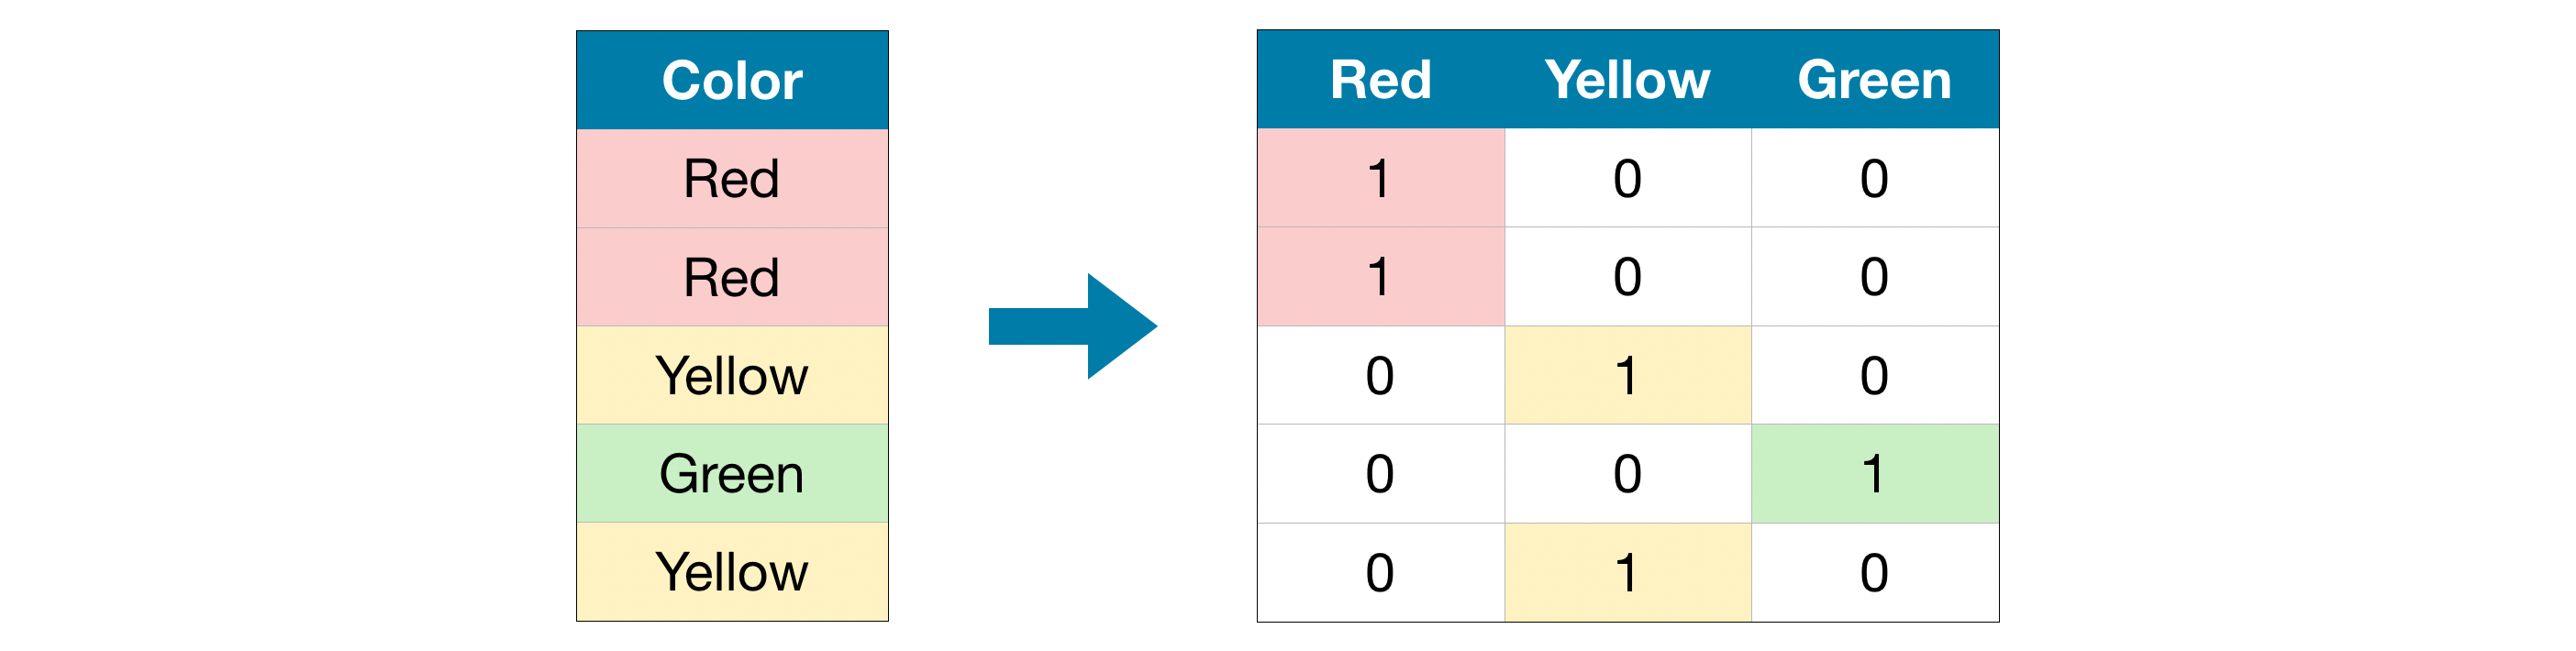

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
pd.get_dummies(df)
# df= pd.get_dummies(df)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
pd.get_dummies(df, drop_first=True)

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


> One Hot Encoding >> interview question!!!

### **df.replace() - df.map() (`Ordinal to Numeric`)**

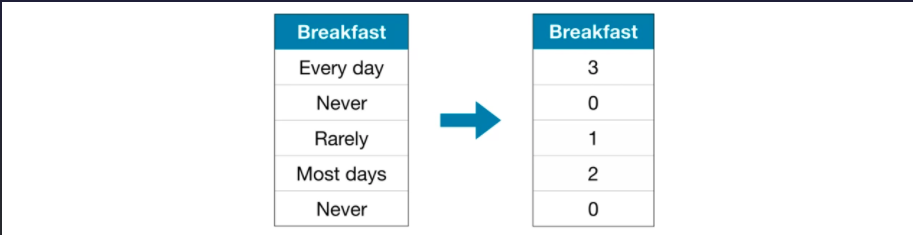

In [ ]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
{'Ideal':4, 'Premium':3, 'Very Good':2, 'Good':1, 'Fair':0}

{'Fair': 0, 'Good': 1, 'Ideal': 4, 'Premium': 3, 'Very Good': 2}

In [ ]:
df.cut = df.cut.replace({'Ideal':4, 'Premium':3, 'Very Good':2, 'Good':1, 'Fair':0})
# or
# df.cut = df.cut.map({'Ideal':4, 'Premium':3, 'Very Good':2, 'Good':1, 'Fair':0})


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


>> Label Encoding >> interview question!!!

## Digitalize Numeric Data
`np.digitize()`

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.dropna(subset=['age'], axis=0, inplace=True)

In [ ]:
bins = np.array([0, 3, 13, 18, 30, 60, 100])
digitized = np.digitize(df.age, bins)

In [ ]:
# pd.Series(digitized).value_counts().sort_index().plot.bar();
pd.Series(digitized).value_counts().sort_index()

1     24
2     45
3     44
4    271
5    304
6     26
dtype: int64

In [ ]:
df.age=digitized
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,4,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,5,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,4,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,5,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,5,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,4,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,4,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,4,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Grouping and Aggregation

### **df.groupby()**

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.groupby("sex").age.mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [ ]:
df.groupby(["class","sex"]).survived.mean().to_frame()

survived
class  sex             
First  female  0.968085
       male    0.368852
Second female  0.921053
       male    0.157407
Third  female  0.500000
       male    0.135447

### **df.groupby().aggregate()**

In [ ]:
df.groupby('sex').age.agg('min')

sex
female    0.75
male      0.42
Name: age, dtype: float64

In [ ]:
df.groupby('class').agg({'age': ['min', 'max'], 'survived': 'sum'})

age       survived
         min   max      sum
class                      
First   0.92  80.0      136
Second  0.67  70.0       87
Third   0.42  74.0      119

In [ ]:
df.groupby(['class','sex']).agg({'age': ['min', 'max'], 'survived': 'sum'})

age       survived
                min   max      sum
class  sex                        
First  female  2.00  63.0       91
       male    0.92  80.0       45
Second female  2.00  57.0       70
       male    0.67  70.0       17
Third  female  0.75  63.0       72
       male    0.42  74.0       47

### **df.groupby().filter()**

In [ ]:
df.groupby('class').filter(lambda x: x["age"].mean()>35)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### **df.groupby().transform()**

In [ ]:
df.dropna(subset=['age'], axis=0, inplace=True)
bins = np.array([0, 3, 13, 18, 30, 60, 100])
df["generation"]=np.digitize(df.age, bins)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,generation
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,4
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,5
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,4
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,5
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,5


In [ ]:
df["generation"] = df["generation"].replace({1:'baby',
                                             2:'child',
                                             3:'teenager',
                                             4:'young',
                                             5:'mature',
                                             6:'old'})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,generation
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,mature
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,mature
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,mature


In [ ]:
df['generation_age_mean'] = df.groupby('generation').age.transform('mean')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,generation,generation_age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,23.396679
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,mature,39.968750
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young,23.396679
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,mature,39.968750
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,mature,39.968750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,mature,39.968750
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,young,23.396679
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,young,23.396679
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,young,23.396679


>> feature engineering >> interview question !!!

### **df.groupby().apply()**

In [ ]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [ ]:
df.apply('mean')
# or
# df.mean()

mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
model_year        76.010050
dtype: float64

In [ ]:
df.groupby('origin').mpg.apply('mean', axis=1)

# or
# df.groupby('origin').apply(lambda x: x['mpg'].mean(), axis=1)

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [ ]:
df["make"] = df.name.apply(lambda x: x.split()[0])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [ ]:
df["model"] = df.name.apply(lambda x: ' '.join(x.split()[1:]))
# or
# df["model"] = df.apply(lambda x: ' '.join(x['name'].split()[1:]), axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


### **pd.crosstab()**

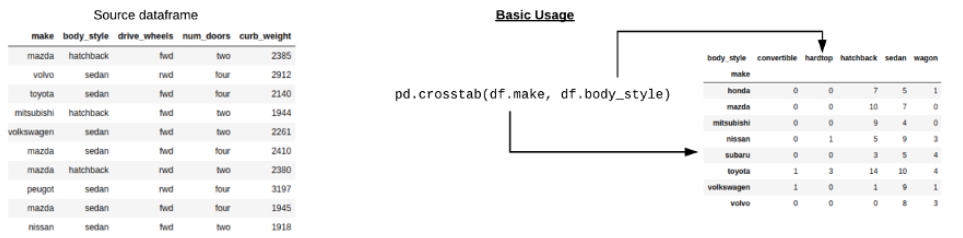

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
pd.crosstab(index= df['class'], 
            columns=df.sex, 
            values=df.survived,
            aggfunc='mean')

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


## Import and Export Dataset

### **pd.read_csv() and df.to_csv()**
<br>path, sep, header, index_col parameters

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv', header=list(range(5)), sep="|")

In [56]:
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv', sep="|",index_col=0)
df2.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **pd.read_excel() and df.to_excel()**
<br>sheet_name parameter

In [48]:
df.to_excel("/content/drive/MyDrive/Colab Notebooks/iris.xlsx", index=False)

In [50]:
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/iris.xlsx", index_col=None)
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **pd.read_pickle() and df.to_pickle()**

In [51]:
df.to_pickle("/content/drive/MyDrive/Colab Notebooks/iris.pkl")

In [52]:
df2 = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/iris.pkl")
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Hierarchical indexing (MultiIndex)

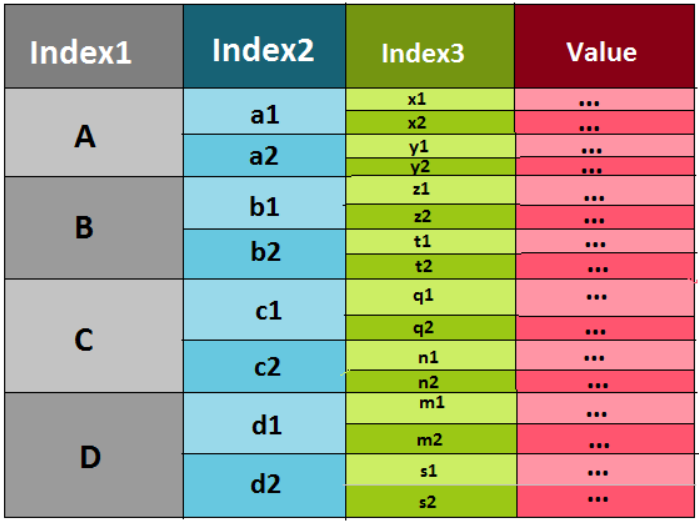

### **MultiIndex.from_product()**

In [ ]:
group_1=["opel", "bmw", "audi", "toyota"]
group_2=["sedan", "hatchback"]
iterables = [group_1, group_2]

In [ ]:
index = pd.MultiIndex.from_product(iterables, names=["make", "model"])
index

MultiIndex([(  'opel',     'sedan'),
            (  'opel', 'hatchback'),
            (   'bmw',     'sedan'),
            (   'bmw', 'hatchback'),
            (  'audi',     'sedan'),
            (  'audi', 'hatchback'),
            ('toyota',     'sedan'),
            ('toyota', 'hatchback')],
           names=['make', 'model'])

In [ ]:
df = pd.DataFrame(0, index=index, columns=["price","mileage","weight"])

# df = pd.DataFrame(np.random.randint(10**5, size=(8,3)), 
#                   index=index,  
#                   columns=["price","mileage","weight"])
df

price  mileage  weight
make   model                            
opel   sedan          0        0       0
       hatchback      0        0       0
bmw    sedan          0        0       0
       hatchback      0        0       0
audi   sedan          0        0       0
       hatchback      0        0       0
toyota sedan          0        0       0
       hatchback      0        0       0

### **Hierarchical columns**

In [ ]:
df.T

make     opel             bmw            audi           toyota          
model   sedan hatchback sedan hatchback sedan hatchback  sedan hatchback
price       0         0     0         0     0         0      0         0
mileage     0         0     0         0     0         0      0         0
weight      0         0     0         0     0         0      0         0

In [ ]:
# df = pd.DataFrame(0, index=["price", "mileage", "weight"], columns=index)
# df = pd.DataFrame(np.nan, index=["price", "mileage", "weight"], columns=index)

df = pd.DataFrame(np.random.randn(3,8), 
                  index=["price", "mileage", "weight"], 
                  columns=index)

df

make         opel                 bmw  ...      audi    toyota          
model       sedan hatchback     sedan  ... hatchback     sedan hatchback
price   -0.279298 -0.901559 -0.747590  ...  0.413043  0.205663 -0.495114
mileage -1.815153 -0.450980  1.313032  ... -0.591058  0.175243  1.498463
weight  -2.725638  1.063447 -0.992398  ... -0.830939  0.080884  0.040907

[3 rows x 8 columns]

## Pivoting and Stacking

### **df.pivot()**

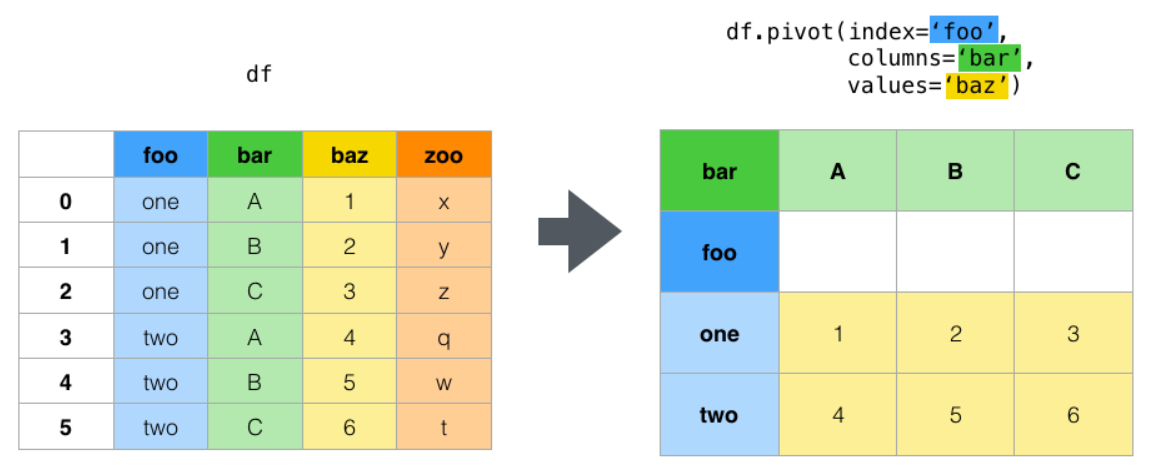

In [ ]:
df = pd.DataFrame(np.random.randint(10**5, size=(8,3)), 
                  index=index,  
                  columns=["price","mileage","weight"])
df.reset_index(inplace=True)
df

,make,model,price,mileage,weight
0,opel,sedan,83798,55438,78206
1,opel,hatchback,85039,1567,29339
2,bmw,sedan,83450,98307,36548
3,bmw,hatchback,72437,8310,86945
4,audi,sedan,74676,86429,61945
5,audi,hatchback,44674,15956,60073
6,toyota,sedan,31585,77060,80814
7,toyota,hatchback,56226,86723,63102


In [ ]:
df.pivot(index='make',columns='model',values='price')

model,hatchback,sedan
make,,
audi,44674,74676
bmw,72437,83450
opel,85039,83798
toyota,56226,31585


In [ ]:
df.pivot(index='make',columns='model')

price          mileage           weight       
model  hatchback  sedan hatchback  sedan hatchback  sedan
make                                                     
audi       44674  74676     15956  86429     60073  61945
bmw        72437  83450      8310  98307     86945  36548
opel       85039  83798      1567  55438     29339  78206
toyota     56226  31585     86723  77060     63102  80814

### **df.stack()**

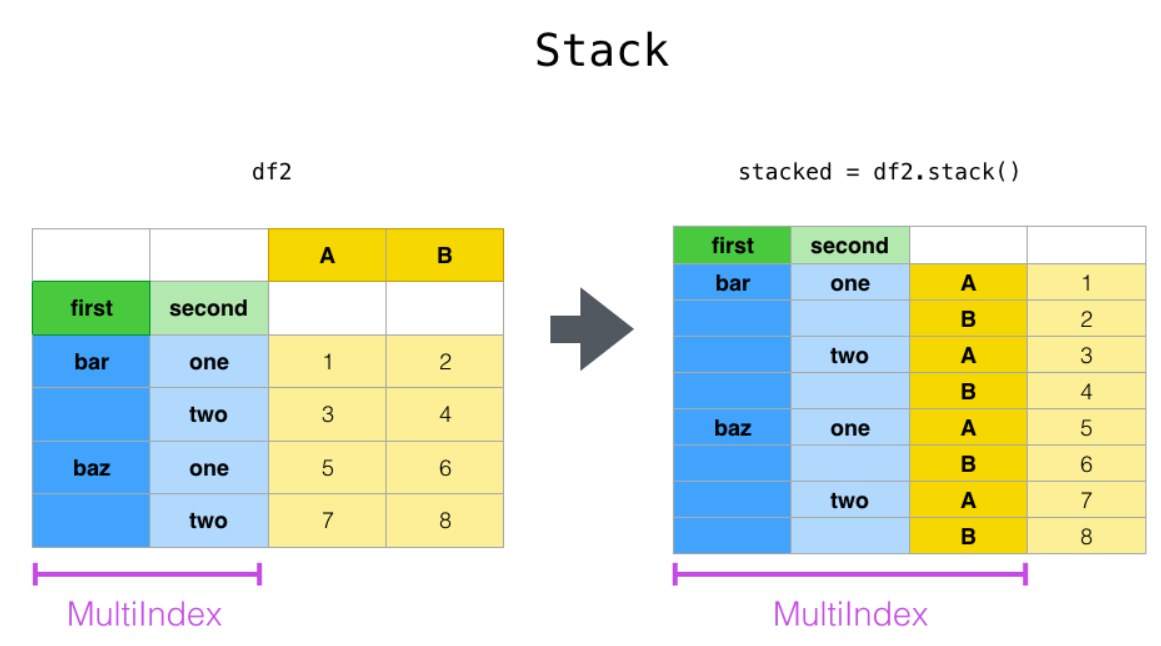

In [ ]:
df = pd.DataFrame(np.random.randint(10**5, size=(8,3)), 
                  index=index,  
                  columns=["price","mileage","weight"])
df

price  mileage  weight
make   model                            
opel   sedan      27289    77744   36300
       hatchback  69629    54185   38352
bmw    sedan      90565     6585   14462
       hatchback  62739    56071   40913
audi   sedan      20420     3314   53152
       hatchback  56323    29293   41975
toyota sedan      97356    81491   22270
       hatchback  30264    28646   22105

In [ ]:
# df.stack().to_frame()
df.stack()

make    model             
opel    sedan      price      27289
                   mileage    77744
                   weight     36300
        hatchback  price      69629
                   mileage    54185
                   weight     38352
bmw     sedan      price      90565
                   mileage     6585
                   weight     14462
        hatchback  price      62739
                   mileage    56071
                   weight     40913
audi    sedan      price      20420
                   mileage     3314
                   weight     53152
        hatchback  price      56323
                   mileage    29293
                   weight     41975
toyota  sedan      price      97356
                   mileage    81491
                   weight     22270
        hatchback  price      30264
                   mileage    28646
                   weight     22105
dtype: int64

In [ ]:
stacked= df.stack()

### **df.unstack( )**

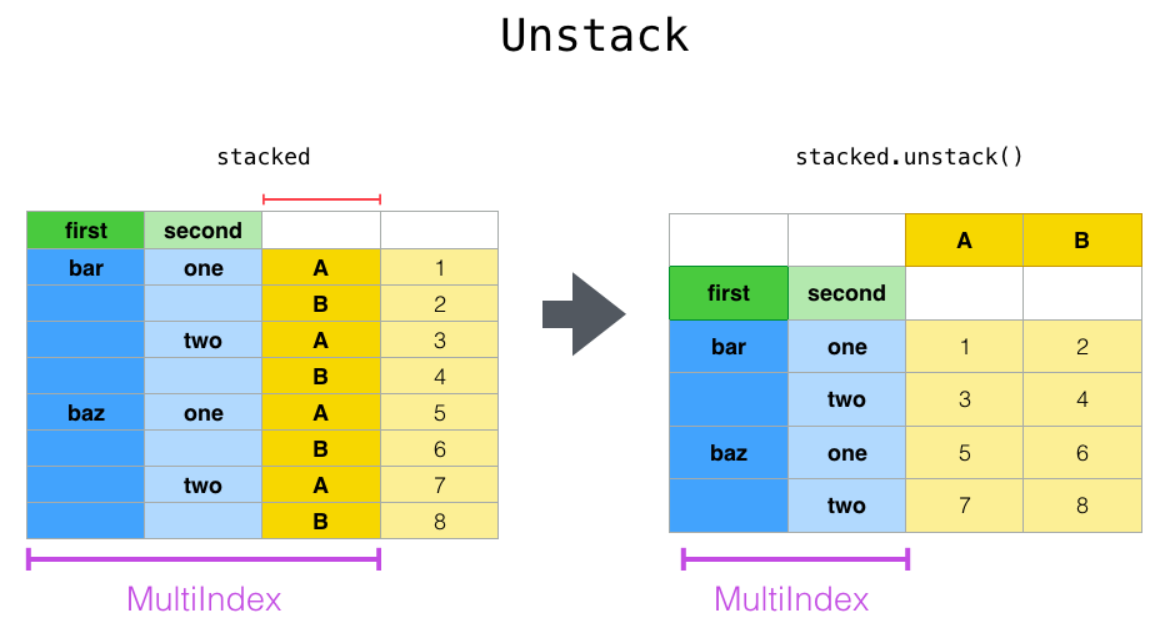

In [ ]:
stacked.unstack()  
#or
#stacked.unstack(2)
#stacked.unstack(-1)


# stacked.unstack(0)
# stacked.unstack(1)

price  mileage  weight
make   model                            
audi   hatchback  56323    29293   41975
       sedan      20420     3314   53152
bmw    hatchback  62739    56071   40913
       sedan      90565     6585   14462
opel   hatchback  69629    54185   38352
       sedan      27289    77744   36300
toyota hatchback  30264    28646   22105
       sedan      97356    81491   22270

## Pivot Tables

### **df.pivot_table()**
<br>index, columns, aggfunc, margins parameters

In [ ]:
df = pd.DataFrame(np.random.randint(10**5, size=(8,3)), 
                  index=index,  
                  columns=["price","mileage","weight"]).reset_index()
df

,make,model,price,mileage,weight
0,opel,sedan,14544,31676,19052
1,opel,hatchback,176,86929,82515
2,bmw,sedan,25820,50753,36045
3,bmw,hatchback,43956,59110,97257
4,audi,sedan,27164,49125,98966
5,audi,hatchback,46623,21674,49585
6,toyota,sedan,61571,36884,38668
7,toyota,hatchback,60566,75041,33129


In [ ]:
# pd.pivot_table(df, values="price", index="make") # as a default:  aggfunc=np.mean
pd.pivot_table(df, values="price", index="make", aggfunc=np.sum)

,price
make,
audi,73787
bmw,69776
opel,14720
toyota,122137


In [ ]:
pd.pivot_table(df, values=["price","mileage","weight"], index="make", aggfunc={'price': np.mean,
                                                                               'mileage': np.median,
                                                                               "weight": np.max})

,mileage,price,weight
make,,,
audi,35399.5,36893.5,98966
bmw,54931.5,34888.0,97257
opel,59302.5,7360.0,82515
toyota,55962.5,61068.5,38668


In [ ]:
# Alternative
df.groupby("make").agg({'price' : ['mean'], 
                        'mileage' : ['median'], 
                        'weight' : ['max']}).droplevel(1, axis=1)

,price,mileage,weight
make,,,
audi,36893.5,35399.5,98966
bmw,34888.0,54931.5,97257
opel,7360.0,59302.5,82515
toyota,61068.5,55962.5,38668


## What is Missing Data?

## Missingno  visual anaylsis

### **missingno**

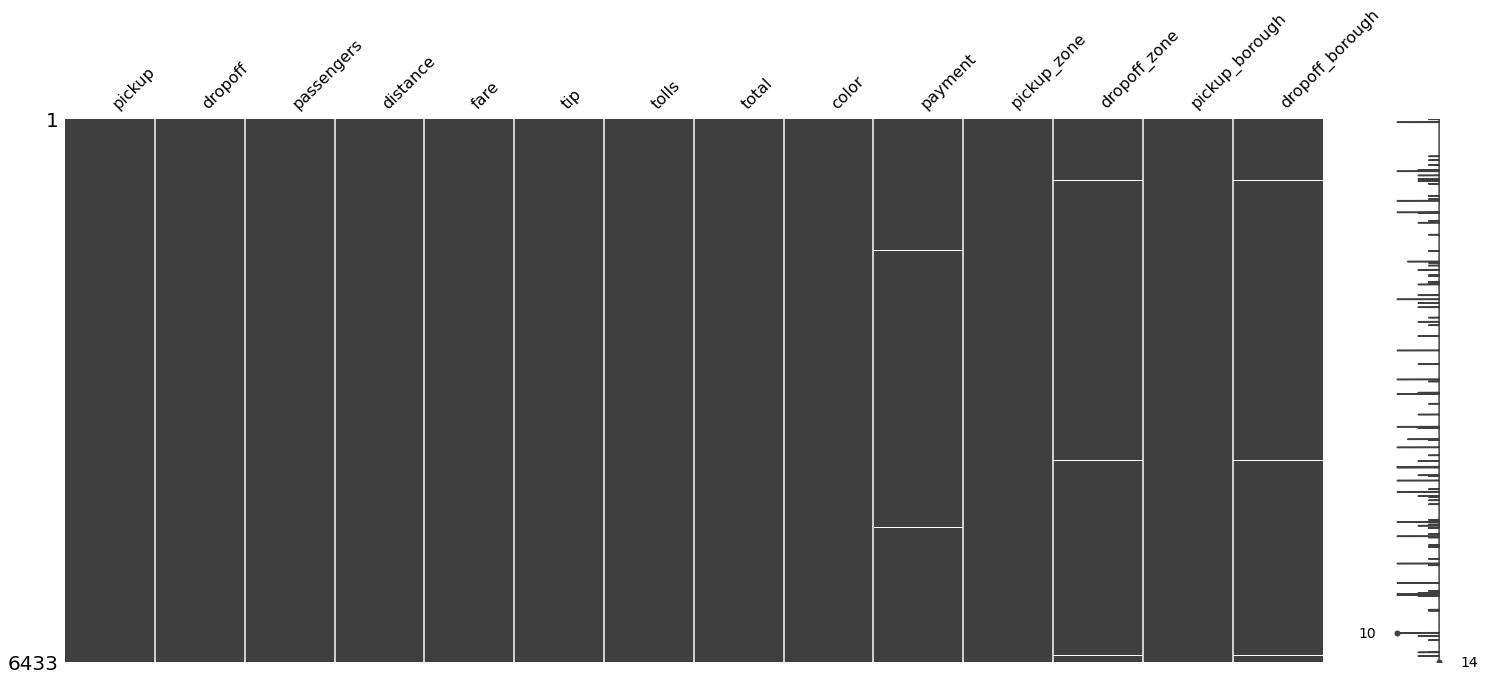

In [ ]:
import missingno as msno
msno.matrix(df);

In [ ]:
msno.bar(df);

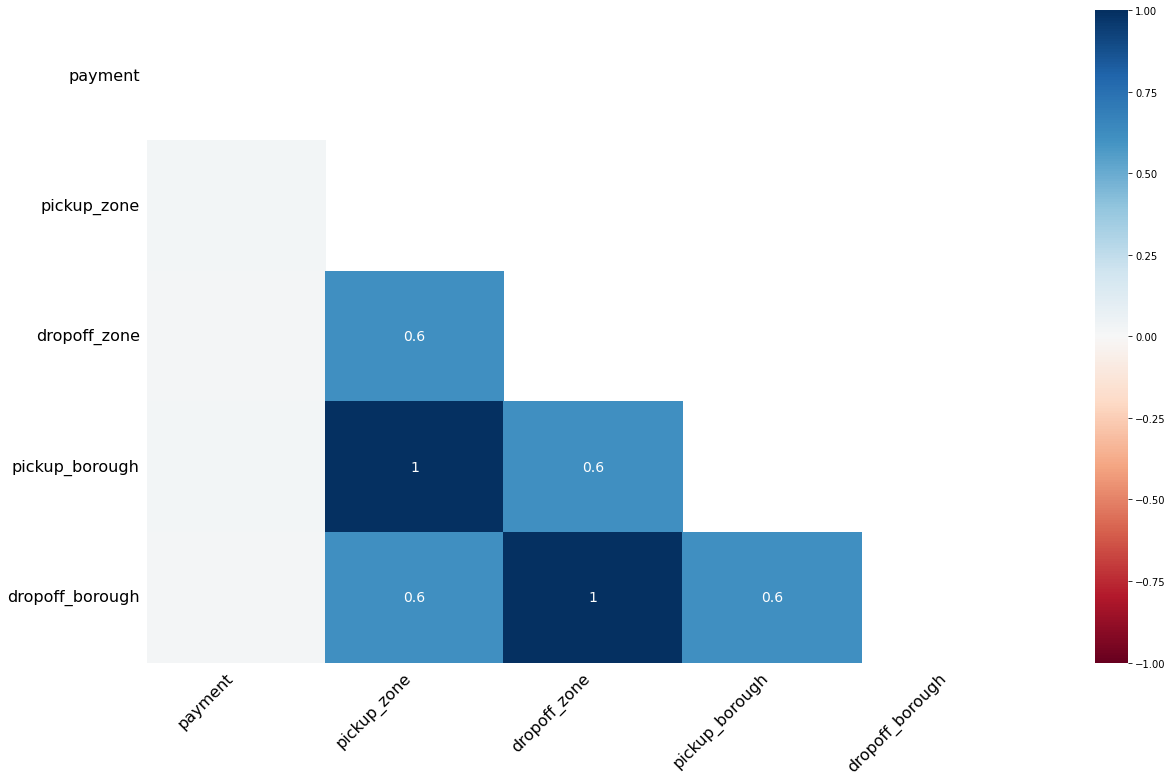

In [ ]:
msno.heatmap(df);

### **headmap**

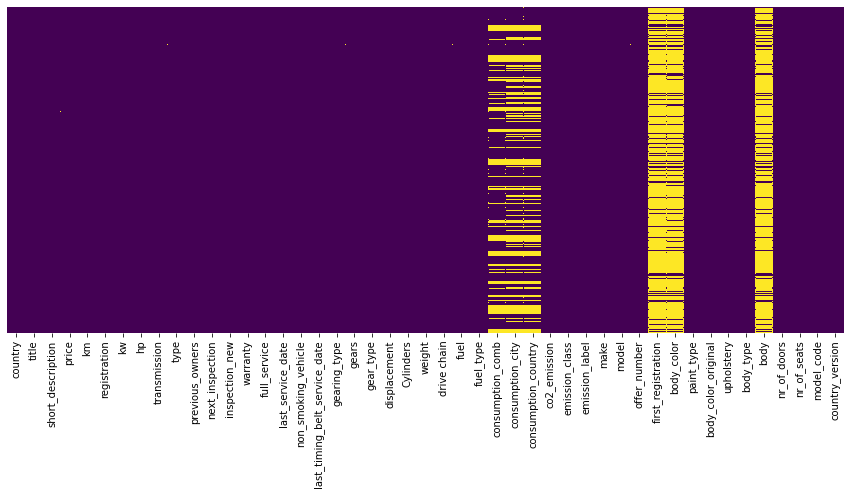

In [58]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

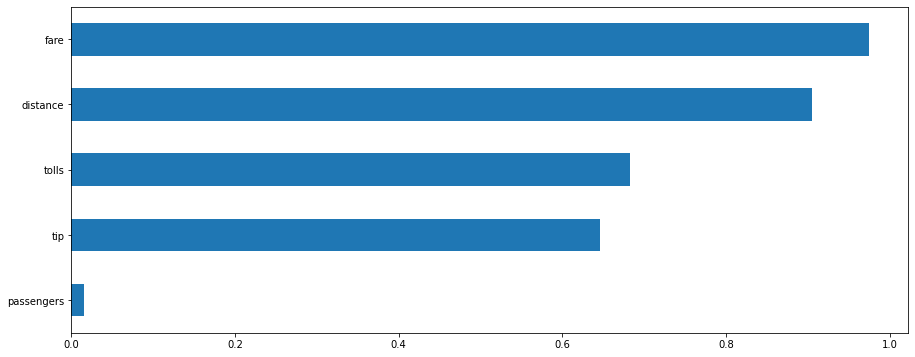

In [ ]:
plt.figure(figsize=(15,6))
df.corr()["total"].sort_values()[:-1].plot.barh();

## Dealing with Missing Values

In [126]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini ffill & bfill ile doldurur.
# Hala null deger kalma ihtimaline binaen, gruplama yapmaksizin, uzerinde calisilan sutunda da(col_name) ekstradan ffill & bfill yapar
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))


# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini mode ile doldurur.
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))


# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill/bfill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

def null_values(df, rate=0):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)

### Mean, Median, Mode, ffill/bfill

In [332]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_dataset.csv')
df.head()

,make_model,body_type,km,gear_type,fuel_type,price
0,Volkswagen up!,Compact,155000.0,Manuel,Gasoline,4495.0
1,Opel Corsa,Compact,58223.0,Semi-automatic,Gasoline,NaN
2,Toyota Tundra,Transporter,10.0,Semi-automatic,Other,69500.0
3,Opel Meriva,Van,149051.0,Semi-automatic,Gasoline,8949.0
4,Opel Meriva,Van,343723.0,NaN,Diesel,3450.0


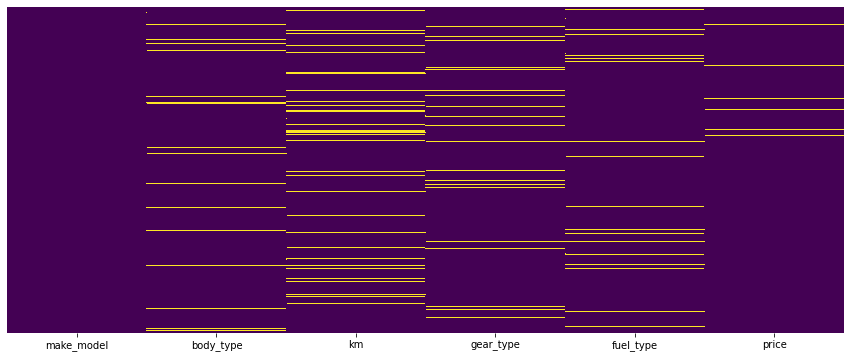

In [333]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [334]:
null_values(df)

,Missing_Records,Percentage (%)
km,1000,10.00
gear_type,700,7.00
fuel_type,500,5.00
body_type,300,3.00
price,199,1.99


In [335]:
df.groupby('make_model')["body_type"].describe()

,count,unique,top,freq
make_model,,,,
Honda Accord,12,3,Sedans,7
Honda CR-V,70,2,Off-Road/Pick-up,66
Honda CR-Z,10,3,Coupe,8
Honda Civic,111,4,Compact,87
Honda Fit,1,1,Compact,1
...,...,...,...,...
Volkswagen Touareg,42,3,Off-Road/Pick-up,39
Volkswagen Touran,191,4,Van,162
Volkswagen Transporter,73,4,Transporter,62


In [336]:
fill_most(df, 'make_model', 'body_type')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Number of NaN :  0
------------------
Compact             3192
Off-Road/Pick-up    1918
Station wagon       1823
Van                 1344
Transporter          934
Sedans               372
Convertible          187
Other                151
Coupe                 79
Name: body_type, dtype: int64


In [337]:
fill(df, 'make_model', 'body_type', 'km', 'median')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Number of NaN :  0
------------------
10.0        257
1.0         157
15.0         70
5.0          53
64377.5      49
           ... 
328464.0      1
29950.0       1
59942.0       1
105015.0      1
186365.0      1
Name: km, Length: 7525, dtype: int64


In [338]:
fill(df, 'make_model', 'body_type', 'gear_type', 'ffill')

Number of NaN :  0
------------------
Manuel            4500
Automatic         4059
Semi-automatic    1441
Name: gear_type, dtype: int64


In [339]:
fill(df, 'make_model', 'body_type', 'fuel_type', 'ffill')

Number of NaN :  0
------------------
Gasoline             5140
Diesel               2386
Electric/Gasoline    1422
Electric              925
Other                 126
Electric/Diesel         1
Name: fuel_type, dtype: int64


In [340]:
fill(df, 'make_model', 'body_type', 'price', 'median')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Number of NaN :  0
------------------
8950.0     154
9950.0     118
7950.0     116
6950.0     101
10950.0    101
          ... 
9751.0       1
53256.0      1
10740.0      1
7649.0       1
15104.0      1
Name: price, Length: 2386, dtype: int64


In [341]:
data=df.copy()

### Interpolation

In [180]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather_data.csv')
df.head()

,Month,Day,MaxTemp,Sunshine,Humidity9am,Pressure9am
0,June,1,31.9,10.9,48.0,1013.3
1,June,2,33.3,10.8,59.0,1013.4
2,June,3,32.2,6.3,56.0,1013.1
3,June,4,32.6,10.4,48.0,1013.3
4,June,5,32.3,10.6,52.0,1014.9


In [196]:
df.isnull().sum()

Month          0
Day            0
MaxTemp        6
Sunshine       6
Humidity9am    4
Pressure9am    8
dtype: int64

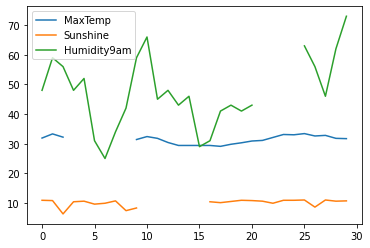

In [188]:
df[['MaxTemp','Sunshine','Humidity9am']].plot();

In [193]:
df2 = df.interpolate(method ='linear', limit_direction ='forward')
# method =‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

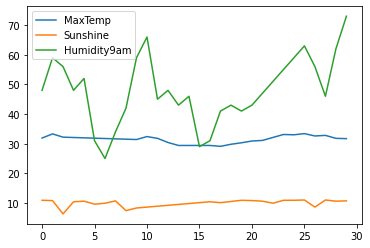

In [194]:
df2[['MaxTemp','Sunshine','Humidity9am']].plot();

### Others methods

You can use Simple imputation, Multivaried Imputation and Ycimpute methods for dealing with missing values. These methods predict the missing values by using some machine learning algorithms.

## Outlier Analysis

### IQR
<br>Capping, Mean, Median, Mode, Assign Nan Value

In [373]:
def replace_outliers(col, replaced_value='median',whisker=1.5):
  # replace outliers with 'median','mean','mode' or an assigned value.

  iqr = (np.quantile(df[col], 0.75))-(np.quantile(df[col], 0.25))
  upper_bound = np.quantile(df[col], 0.75)+(whisker*iqr)
  lower_bound = np.quantile(df[col], 0.25)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < df[col].max() else df[col].max(),
  lower_bound = lower_bound if lower_bound > df[col].min() else df[col].min(),

  if replaced_value=='median':
    df[col] = df[col].mask(df[col] > upper_bound, df[col].median())
    df[col] = df[col].mask(df[col] < lower_bound, df[col].median())
  elif replaced_value=='mean':
    df[col] = df[col].mask(df[col] > upper_bound, df[col].mean())
    df[col] = df[col].mask(df[col] < lower_bound, df[col].mean())
  elif replaced_value=='mode':
    df[col] = df[col].mask(df[col] > upper_bound, df[col].mode()[0])
    df[col] = df[col].mask(df[col] < lower_bound, df[col].mode()[0])
  else:
    df[col] = df[col].mask(df[col] > upper_bound, replaced_value)
    df[col] = df[col].mask(df[col] < lower_bound, replaced_value)   

  plt.figure(figsize=(8,3))
  sns.boxplot(x= df[col]);

  return df[col]

In [374]:
def outliers(s):
  # summary of the outliers
  iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
  upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
  lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
  f = []
  for i in s:
      if i > upper_bound:
          f.append(i)
      elif i < lower_bound:
          f.append(i)
  sums = len(f)
  pros = len(f)/len(s)*100
  d = {'IQR':iqr,
        'Upper Bound':upper_bound if upper_bound < s.max() else s.max(),
      'Lower Bound':lower_bound if lower_bound > s.min() else s.min(),
      'Sum outliers': sums,'percentage outliers':pros}
  d = pd.DataFrame(d.items(),columns = ['sub','values'])
  return(d)

def capping_outliers(col, whisker=1.5):
  # replace outliers with upper_bound and lower_bound values
  iqr = (np.quantile(df[col], 0.75))-(np.quantile(df[col], 0.25))
  upper_bound = np.quantile(df[col], 0.75)+(whisker*iqr)
  lower_bound = np.quantile(df[col], 0.25)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < df[col].max() else df[col].max(),
  lower_bound = lower_bound if lower_bound > df[col].min() else df[col].min(),

  df[col] = np.where(df[col] > upper_bound, 
                                upper_bound,df[col])
  df[col] = np.where(df[col] < lower_bound, 
                                lower_bound,df[col])
  plt.figure(figsize=(8,3))
  sns.boxplot(x= df[col]);
  return df[col]

In [375]:
df = data.copy()
df.head()

,make_model,body_type,km,gear_type,fuel_type,price
0,Volkswagen up!,Compact,155000.0,Manuel,Gasoline,4495.0
1,Opel Corsa,Compact,58223.0,Semi-automatic,Gasoline,8950.0
2,Toyota Tundra,Transporter,10.0,Semi-automatic,Other,69500.0
3,Opel Meriva,Van,149051.0,Semi-automatic,Gasoline,8949.0
4,Opel Meriva,Van,343723.0,Semi-automatic,Diesel,3450.0


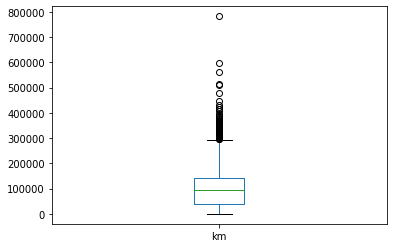

In [376]:
df.km.plot.box();

In [377]:
outliers(df.km)

,sub,values
0,IQR,102016.50
1,Upper Bound,296024.75
2,Lower Bound,0.00
3,Sum outliers,84.00
4,percentage outliers,0.84


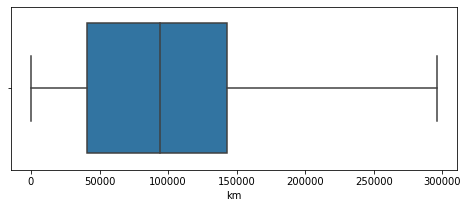

In [378]:
df.km = capping_outliers('km')

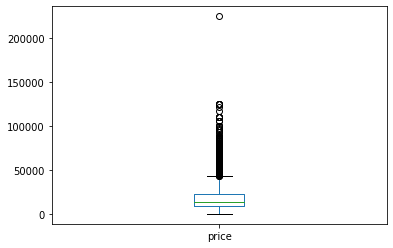

In [379]:
df.price.plot.box();

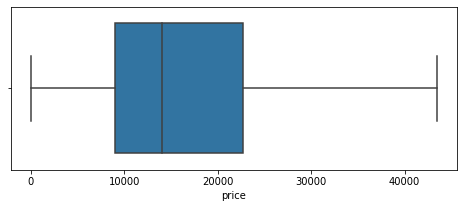

In [380]:
df.price = capping_outliers('price')

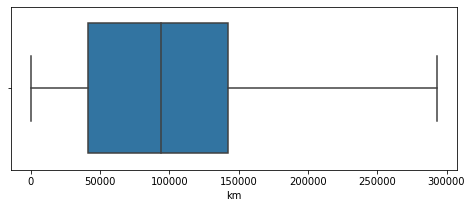

In [389]:
df = data.copy()
df.km =replace_outliers('km', replaced_value='mean',whisker=1.5)

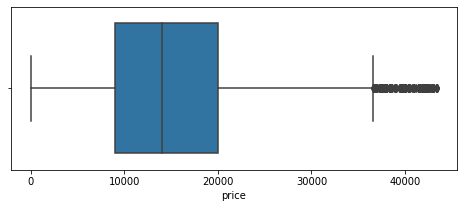

In [390]:
df.price =replace_outliers('price', replaced_value='median',whisker=1.5)

### Logarithm

In [355]:
f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)

,sub,values
0,IQR,13800.00
1,Upper Bound,43450.00
2,Lower Bound,2.00
3,Sum outliers,552.00
4,percentage outliers,5.52


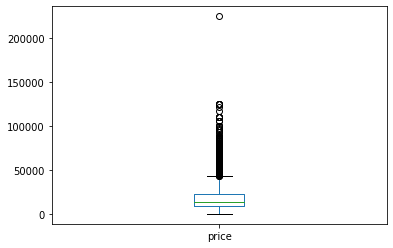

In [364]:
df = data.copy()
df.price.plot.box();
outliers(df.price)

,sub,values
0,IQR,0.932912
1,Upper Bound,12.431688
2,Lower Bound,8.700041
3,Sum outliers,32.000000
4,percentage outliers,0.320000


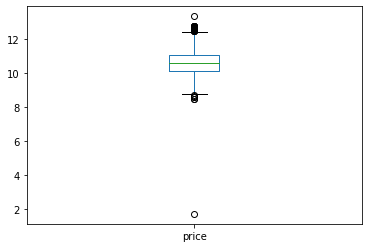

In [365]:
df['price'] = df['price'].apply(f_log)
df.price.plot.box();
outliers(df.price)

### Root

In [357]:
f_sqrt=lambda x:(np.sqrt(x) if x>1 else -np.sqrt(-x) if x<-1 else x)

,sub,values
0,IQR,102016.50
1,Upper Bound,296024.75
2,Lower Bound,0.00
3,Sum outliers,84.00
4,percentage outliers,0.84


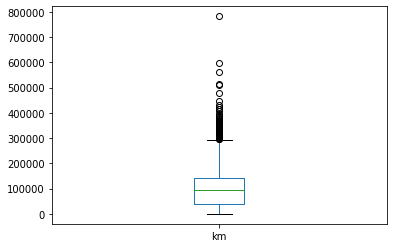

In [362]:
df = data.copy()
df.km.plot.box();
outliers(df.km)

,sub,values
0,IQR,175.709601
1,Upper Bound,641.717809
2,Lower Bound,0.000000
3,Sum outliers,11.000000
4,percentage outliers,0.110000


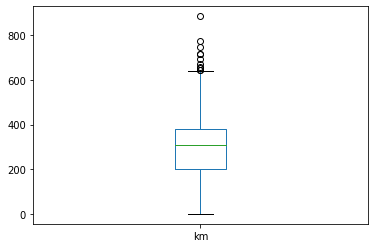

In [363]:
df['km'] = df['km'].apply(f_sqrt)
df.km.plot.box();
outliers(df.km)

### Winsorization

In [198]:
from scipy.stats.mstats import winsorize
def col_plot(df,col_name,up=0.1,down=0, iqr=1.5):
  
  f_sqrt=lambda x:(np.sqrt(x) if x>1 else -np.sqrt(-x) if x<-1 else x)
  f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
  root= df[col_name].apply(f_sqrt)
  log= df[col_name].apply(f_log)
  winsor= winsorize(df[col_name], (down,up))
  root_winsor=winsorize(df[col_name].apply(f_sqrt), (down,up))

  plt.figure(figsize=(35,15))
  plt.suptitle(col_name,fontsize=20)

  plt.subplot(251) # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
  plt.hist(df[col_name], bins = 20)
  plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
  plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
  plt.tight_layout
  plt.xlabel("Histogram ±3z")
  plt.ylabel(col_name)

  plt.subplot(252) # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
  plt.hist(winsor, bins = 22)
  plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
  plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
  plt.xlabel('WINSORIZE_Histogram ±3z')
  plt.ylabel(col_name)
  plt.tight_layout

  plt.subplot(253)
  plt.hist(root, bins=22)
  plt.axvline(x=root.mean()+3*root.std(),color='red')
  plt.axvline(x=root.mean()-3*root.std(),color='red')
  plt.xlabel('ROOT_Histogram ±3z')

  plt.subplot(254)
  plt.hist(log, bins=22)
  plt.axvline(x=log.mean()+3*log.std(),color='red')
  plt.axvline(x=log.mean()-3*log.std(),color='red')
  plt.xlabel('LOG_Histogram ±3z')

  plt.subplot(255)
  plt.hist(log, bins=22)
  plt.axvline(x=root_winsor.mean()+3*root_winsor.std(),color='red')
  plt.axvline(x=root_winsor.mean()-3*root_winsor.std(),color='red')
  plt.xlabel('ROOT-WINSORIZE_Histogram ±3z')

  plt.subplot(256)
  plt.boxplot(df[col_name], whis = iqr)
  plt.xlabel(f"IQR:{iqr}")

  plt.subplot(257)
  plt.boxplot(winsor, whis = iqr)
  plt.xlabel(f'WINSORIZE - IQR:{iqr}')

  plt.subplot(258)
  plt.boxplot(root, whis = iqr)
  plt.xlabel(f"ROOT - IQR:{iqr}")

  plt.subplot(259)
  plt.boxplot(log, whis = iqr)
  plt.xlabel(f"LOG - IQR:{iqr}")

  plt.subplot(2,5,10)
  plt.boxplot(log, whis = iqr)
  plt.xlabel(f"ROOT & WINSORIZE - IQR:{iqr}")
  plt.show()

def pol_twin(df, col, target, figsize=(10,6)):
  fig = plt.figure(figsize=figsize)
  ax = fig.add_subplot(111)
  df[col].value_counts(dropna=False, normalize=True).sort_index().plot.bar(ax= ax)
  ax_twin = ax.twinx()
  df.groupby(col)[target].mean().plot.line(ax=ax_twin, color='red', marker='o', ms=10)
  ax.grid()
  ax_twin.legend()
  ax.legend();

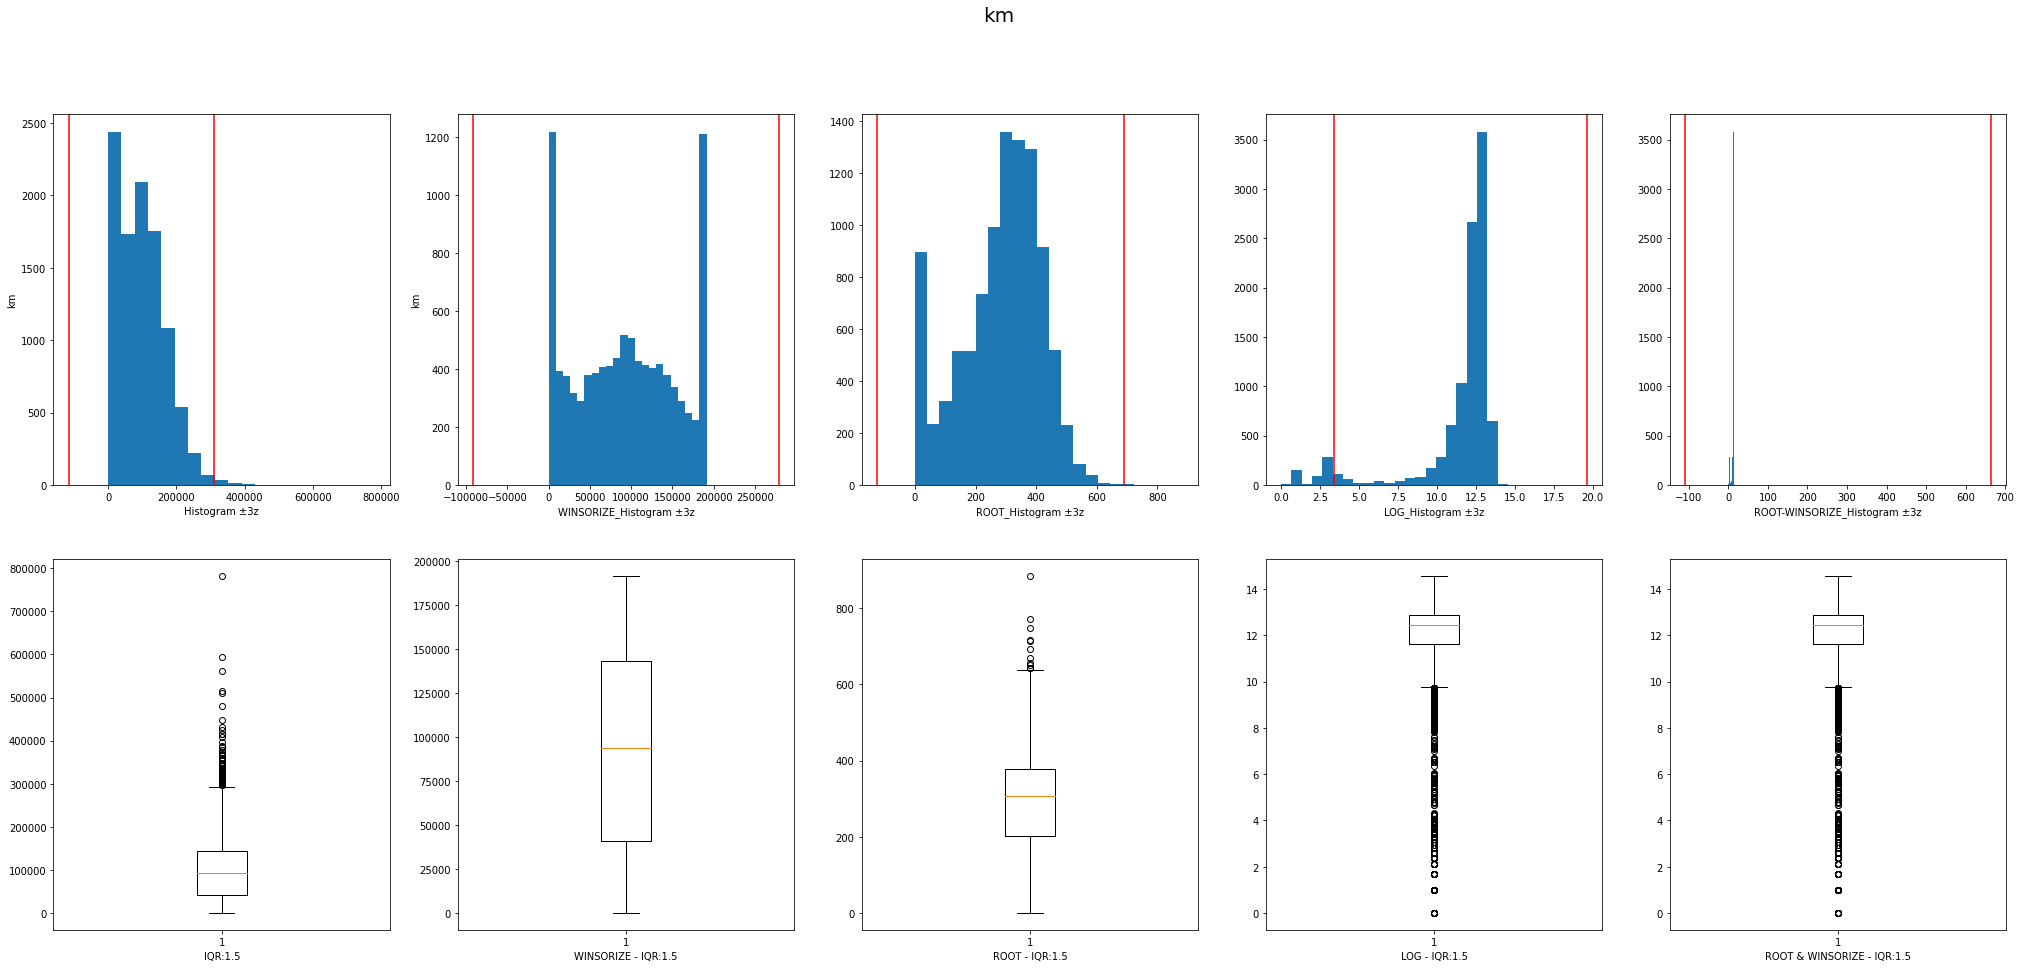

In [212]:
col_plot(df, "km")